In [19]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [362]:
import pandas as pd
import statsmodels.api as sm
import matplotlib
warning.filterwarnings("ignore")
plt.style.use('fivethirtyeight')

matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

NameError: name 'warning' is not defined

### Houston

In [21]:
houston = pd.read_csv('Houston.csv')
houston.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2021-10-06T11:00:00+00:00,2021-10-06T06:00:00-05:00,o3,0.001,ppm,29.670025,-95.128508
1,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2021-10-06T10:00:00+00:00,2021-10-06T05:00:00-05:00,o3,0.003,ppm,29.670025,-95.128508


In [22]:
houston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56854 entries, 0 to 56853
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  56854 non-null  int64  
 1   location    56854 non-null  object 
 2   city        56854 non-null  object 
 3   country     56854 non-null  object 
 4   utc         56854 non-null  object 
 5   local       56854 non-null  object 
 6   parameter   56854 non-null  object 
 7   value       56854 non-null  float64
 8   unit        56854 non-null  object 
 9   latitude    56854 non-null  float64
 10  longitude   56854 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.8+ MB


In [23]:
houston.shape

(56854, 11)

In [24]:
houston['parameter'].value_counts()

o3      33762
pm25    23092
Name: parameter, dtype: int64

In [25]:
houston['unit'].value_counts()

ppm      33762
µg/m³    23092
Name: unit, dtype: int64

In [26]:
houston = houston.loc[(houston['parameter'] == 'pm25') & (houston['unit'] == 'µg/m³')]

In [27]:
houston['utc'] = pd.to_datetime(houston['utc'])

In [28]:
houston = houston.sort_values('utc')
houston.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
56853,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 04:00:00+00:00,2016-06-14T23:00:00-05:00,pm25,15.7,µg/m³,29.670025,-95.128508
56850,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 05:00:00+00:00,2016-06-15T00:00:00-05:00,pm25,15.1,µg/m³,29.670025,-95.128508


In [29]:
houston['year'] = houston['utc'].dt.year

In [30]:
houston.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,year
56853,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 04:00:00+00:00,2016-06-14T23:00:00-05:00,pm25,15.7,µg/m³,29.670025,-95.128508,2016
56850,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 05:00:00+00:00,2016-06-15T00:00:00-05:00,pm25,15.1,µg/m³,29.670025,-95.128508,2016


In [31]:
houston['year'].value_counts()

2019    7700
2018    5561
2017    5316
2016    4515
Name: year, dtype: int64

In [32]:
houston.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,year
56853,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 04:00:00+00:00,2016-06-14T23:00:00-05:00,pm25,15.7,µg/m³,29.670025,-95.128508,2016
56850,162,Houston Deer Park C3,Houston-Sugar Land-Baytown,US,2016-06-15 05:00:00+00:00,2016-06-15T00:00:00-05:00,pm25,15.1,µg/m³,29.670025,-95.128508,2016


In [33]:
houston_pm25 = houston.groupby(['year', 'city', 'parameter'], as_index=False).agg({'value':'mean'})
houston_pm25

,year,city,parameter,value
0,2016,Houston-Sugar Land-Baytown,pm25,8.191340
1,2017,Houston-Sugar Land-Baytown,pm25,7.745053
2,2018,Houston-Sugar Land-Baytown,pm25,8.357957
3,2019,Houston-Sugar Land-Baytown,pm25,7.292325


<AxesSubplot:xlabel='year', ylabel='value'>

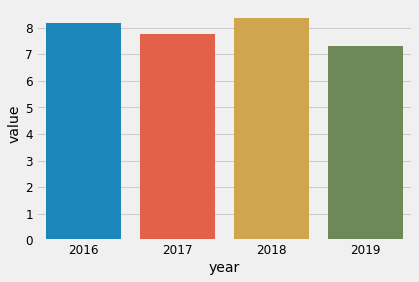

In [34]:
sns.barplot(data=houston_pm25, x='year', y='value')

Houston se mantiene por debajo en los valores de contaminación establecidos por la OMS para pm2.5 anualmente.

### Santiago

In [35]:
santiago = pd.read_csv('Santiago.csv')

In [36]:
santiago.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,25,Parque O'Higgins,Santiago,CL,2021-08-20T21:00:00+00:00,2021-08-20T20:00:00-01:00,pm25,30,µg/m³,-33.464142,-70.660797
1,25,Parque O'Higgins,Santiago,CL,2021-08-20T21:00:00+00:00,2021-08-20T20:00:00-01:00,pm10,100,µg/m³,-33.464142,-70.660797


In [37]:
santiago.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20866 entries, 0 to 20865
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  20866 non-null  int64  
 1   location    20866 non-null  object 
 2   city        20866 non-null  object 
 3   country     20866 non-null  object 
 4   utc         20866 non-null  object 
 5   local       20866 non-null  object 
 6   parameter   20866 non-null  object 
 7   value       20866 non-null  int64  
 8   unit        20866 non-null  object 
 9   latitude    20866 non-null  float64
 10  longitude   20866 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.8+ MB


In [38]:
santiago.shape

(20866, 11)

In [39]:
santiago['parameter'].value_counts()

pm25    10434
pm10    10432
Name: parameter, dtype: int64

In [40]:
santiago['unit'].value_counts()

µg/m³    20866
Name: unit, dtype: int64

In [41]:
santiago = santiago.loc[santiago['parameter'] == 'pm25']

In [42]:
santiago['utc'] = pd.to_datetime(santiago['utc'])

In [43]:
santiago = santiago.sort_values('utc')
santiago.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
20865,25,Parque O'Higgins,Santiago,CL,2020-01-01 04:00:00+00:00,2020-01-01T03:00:00-01:00,pm25,10,µg/m³,-33.464142,-70.660797
20862,25,Parque O'Higgins,Santiago,CL,2020-01-01 05:00:00+00:00,2020-01-01T04:00:00-01:00,pm25,24,µg/m³,-33.464142,-70.660797


In [44]:
santiago['year'] = santiago['utc'].dt.year

In [45]:
santiago.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,year
20865,25,Parque O'Higgins,Santiago,CL,2020-01-01 04:00:00+00:00,2020-01-01T03:00:00-01:00,pm25,10,µg/m³,-33.464142,-70.660797,2020
20862,25,Parque O'Higgins,Santiago,CL,2020-01-01 05:00:00+00:00,2020-01-01T04:00:00-01:00,pm25,24,µg/m³,-33.464142,-70.660797,2020


In [46]:
santiago['year'].value_counts()

2020    7546
2021    2888
Name: year, dtype: int64

In [47]:
santiago_pm25 = santiago.groupby(['year', 'city', 'parameter'], as_index=False).agg({'value':'mean'})
santiago_pm25

,year,city,parameter,value
0,2020,Santiago,pm25,20.293798
1,2021,Santiago,pm25,21.945637


<AxesSubplot:xlabel='year', ylabel='value'>

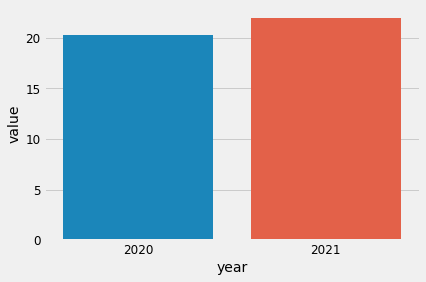

In [48]:
sns.barplot(data=santiago_pm25, x='year', y='value')

### Mexico

In [49]:
mexico = pd.read_csv('df_new_cam.csv')

In [50]:
mexico.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,1739,Camarones,DISTRITO FEDERAL,MX,2021-10-06T14:00:00+00:00,2021-10-06T09:00:00-05:00,pm25,5,µg/m³,19.4684,-99.1697
1,1739,Camarones,DISTRITO FEDERAL,MX,2021-10-06T14:00:00+00:00,2021-10-06T09:00:00-05:00,pm10,17,µg/m³,19.4684,-99.1697


In [51]:
mexico.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14105 entries, 0 to 14104
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  14105 non-null  int64  
 1   location    14105 non-null  object 
 2   city        14105 non-null  object 
 3   country     14105 non-null  object 
 4   utc         14105 non-null  object 
 5   local       14105 non-null  object 
 6   parameter   14105 non-null  object 
 7   value       14105 non-null  int64  
 8   unit        14105 non-null  object 
 9   latitude    14105 non-null  float64
 10  longitude   14105 non-null  float64
dtypes: float64(2), int64(2), object(7)
memory usage: 1.2+ MB


In [52]:
mexico.shape

(14105, 11)

In [53]:
mexico['parameter'].value_counts()

pm10    7086
pm25    7019
Name: parameter, dtype: int64

In [54]:
mexico['unit'].value_counts()

µg/m³    14105
Name: unit, dtype: int64

In [55]:
mexico = mexico.loc[mexico['parameter'] == 'pm25']

In [56]:
mexico['utc'] = pd.to_datetime(mexico['utc'])

In [57]:
mexico = mexico.sort_values('utc')
mexico.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
14104,1739,Camarones,DISTRITO FEDERAL,MX,2019-04-09 20:00:00+00:00,2019-04-09T15:00:00-05:00,pm25,17,µg/m³,19.4684,-99.1697
14102,1739,Camarones,DISTRITO FEDERAL,MX,2019-04-09 21:00:00+00:00,2019-04-09T16:00:00-05:00,pm25,14,µg/m³,19.4684,-99.1697


In [58]:
mexico['year'] = mexico['utc'].dt.year

In [59]:
mexico.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,year
14104,1739,Camarones,DISTRITO FEDERAL,MX,2019-04-09 20:00:00+00:00,2019-04-09T15:00:00-05:00,pm25,17,µg/m³,19.4684,-99.1697,2019
14102,1739,Camarones,DISTRITO FEDERAL,MX,2019-04-09 21:00:00+00:00,2019-04-09T16:00:00-05:00,pm25,14,µg/m³,19.4684,-99.1697,2019


In [60]:
mexico['year'].value_counts()

2020    3349
2021    2359
2019    1311
Name: year, dtype: int64

In [61]:
mexico_pm25 = mexico.groupby(['year', 'city', 'parameter'], as_index=False).agg({'value':'mean'})
mexico_pm25

,year,city,parameter,value
0,2019,DISTRITO FEDERAL,pm25,26.372235
1,2020,DISTRITO FEDERAL,pm25,18.066886
2,2021,DISTRITO FEDERAL,pm25,19.555320


<AxesSubplot:xlabel='year', ylabel='value'>

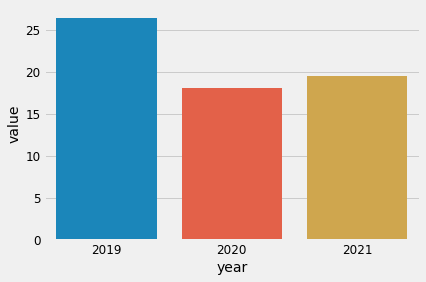

In [62]:
sns.barplot(data=mexico_pm25, x='year', y='value')

### Dehli

In [63]:
dehli = pd.read_csv('Dehli.csv')

In [64]:
dehli.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-12-31T04:00:00+00:00,2020-12-31T09:30:00+05:30,pm10,179.59,µg/m³,28.470691,77.109936
1,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-12-31T04:00:00+00:00,2020-12-31T09:30:00+05:30,pm25,115.80,µg/m³,28.470691,77.109936


In [65]:
dehli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30500 entries, 0 to 30499
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   locationId  30500 non-null  int64  
 1   location    30500 non-null  object 
 2   city        30500 non-null  object 
 3   country     30500 non-null  object 
 4   utc         30500 non-null  object 
 5   local       30500 non-null  object 
 6   parameter   30500 non-null  object 
 7   value       30500 non-null  float64
 8   unit        30500 non-null  object 
 9   latitude    30500 non-null  float64
 10  longitude   30500 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 2.6+ MB


In [66]:
dehli.shape

(30500, 11)

In [67]:
dehli['parameter'].value_counts()

pm10    15250
pm25    15250
Name: parameter, dtype: int64

In [68]:
dehli['unit'].value_counts()

µg/m³    30500
Name: unit, dtype: int64

In [69]:
dehli = dehli.loc[dehli['parameter'] == 'pm25']

In [70]:
dehli['utc'] = pd.to_datetime(dehli['utc'])

In [71]:
dehli = dehli.sort_values('utc')
dehli.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
30498,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-01-01 04:00:00+00:00,2020-01-01T09:30:00+05:30,pm25,446.75,µg/m³,28.470691,77.109936
30496,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-01-01 04:15:00+00:00,2020-01-01T09:45:00+05:30,pm25,400.46,µg/m³,28.470691,77.109936


In [72]:
dehli['year'] = dehli['utc'].dt.year

In [73]:
dehli.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude,year
30498,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-01-01 04:00:00+00:00,2020-01-01T09:30:00+05:30,pm25,446.75,µg/m³,28.470691,77.109936,2020
30496,5570,"Aya Nagar, Delhi - IMD",Delhi,IN,2020-01-01 04:15:00+00:00,2020-01-01T09:45:00+05:30,pm25,400.46,µg/m³,28.470691,77.109936,2020


In [74]:
dehli['year'].value_counts()

2020    15250
Name: year, dtype: int64

In [75]:
dehli_pm25 = dehli.groupby(['year', 'city', 'parameter'], as_index=False).agg({'value':'mean'})
dehli_pm25

,year,city,parameter,value
0,2020,Delhi,pm25,69.113219


Hacer un filtrado por year=2020

**Uniendo los dataframe y evaluando en el año 2020**

In [76]:
mexico_y = mexico_pm25[mexico_pm25['year'] == 2020]

In [77]:
santiago_y = santiago_pm25[santiago_pm25['year'] == 2020]

In [78]:
pm_25_by_country = pd.concat([dehli_pm25, mexico_y, santiago_y], axis=0)

In [79]:
pm_25_by_country

,year,city,parameter,value
0,2020,Delhi,pm25,69.113219
1,2020,DISTRITO FEDERAL,pm25,18.066886
0,2020,Santiago,pm25,20.293798


<AxesSubplot:xlabel='city', ylabel='value'>

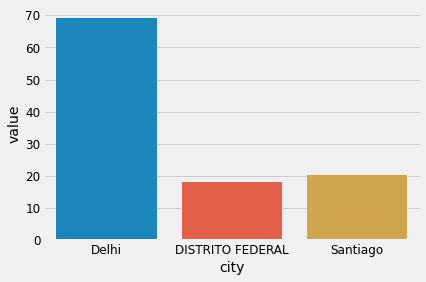

In [80]:
sns.barplot(data=pm_25_by_country, x='city', y='value')

### Historical Data Houston

In [294]:
houston_hist = pd.read_csv('houston-east, houston, texas-air-quality.csv')

In [295]:
to_rename = [column for column in houston_hist.columns]
to_rename

['date', ' pm25', ' pm10', ' o3', ' no2', ' so2', ' co']

In [296]:
to_keep = ['date', 'pm25', 'pm10', 'o3', 'no2', 'so2', 'co']

In [297]:
dict_hou = dict(zip(to_rename, to_keep))
dict_hou

{'date': 'date',
 ' pm25': 'pm25',
 ' pm10': 'pm10',
 ' o3': 'o3',
 ' no2': 'no2',
 ' so2': 'so2',
 ' co': 'co'}

In [298]:
houston_hist.rename(columns=dict_hou, inplace=True)

In [299]:
houston_hist.head(10)

,date,pm25,pm10,o3,no2,so2,co
0,2021/10/2,29,,19,10,,
1,2021/10/3,29,,,,,
2,2021/10/4,58,,,,,
3,2021/9/2,53,,19,8,,
4,2021/9/3,56,,20,10,,
5,2021/9/4,44,,25,5,,
6,2021/9/5,76,,25,3,,
7,2021/9/6,81,,37,5,,
8,2021/9/7,55,,41,13,,
9,2021/9/8,49,,51,19,,


In [300]:
houston_hist.shape

(2793, 7)

In [301]:
houston_hist.drop(columns=['pm10', 'o3', 'no2', 'so2', 'co'], inplace=True)

In [303]:
houston_hist['date'] = pd.to_datetime(houston_hist['date'])

In [305]:
houston_hist.dtypes

date    datetime64[ns]
pm25            object
dtype: object

In [306]:
houston_hist = houston_hist.sort_values('date')
houston_hist.head(2)

,date,pm25
2775,2014-01-01,
2456,2014-01-02,72
2457,2014-01-03,61
2776,2014-01-04,
2777,2014-01-05,
...,...,...
31,2021-09-30,21
32,2021-10-01,27
0,2021-10-02,29
1,2021-10-03,29


In [308]:
houston_hist.set_index('date', inplace=True)

In [309]:
houston_hist.head(2)

,pm25
date,
2014-01-01,
2014-01-02,72


In [310]:
houston_hist.dtypes

pm25    object
dtype: object

In [314]:
houston_hist['pm25'] = houston_hist['pm25'].apply(lambda x: x.strip()).replace('', np.nan)

In [316]:
houston_hist.head(2)

,pm25
date,
2014-01-01,NaN
2014-01-02,72


In [321]:
houston_hist.dropna(inplace=True)

In [322]:
houston_hist['pm25'] = houston_hist['pm25'].astype('int64')

In [324]:
houston_hist.dtypes

pm25    int64
dtype: object

In [333]:
houston_hist.head(2)

,pm25
date,
2014-01-02,72
2014-01-03,61


In [ ]:
houston_hist = houston_hist.loc['2018-01-01':]

In [347]:
houston_hist_m = houston_hist['pm25'].resample('MS').mean() 

In [348]:
houston_hist_m

date
2018-01-01    40.129032
2018-02-01    41.000000
2018-03-01    49.322581
2018-04-01    45.200000
2018-05-01    46.451613
2018-06-01    46.333333
2018-07-01    64.129032
2018-08-01    44.142857
2018-09-01    30.300000
2018-10-01    29.433333
2018-11-01    33.733333
2018-12-01    33.838710
2019-01-01    37.266667
2019-02-01    35.500000
2019-03-01    42.806452
2019-04-01    35.620690
2019-05-01    37.666667
2019-06-01    41.166667
2019-07-01    38.387097
2019-08-01    37.322581
2019-09-01    33.666667
2019-10-01    33.483871
2019-11-01    44.033333
2019-12-01    40.533333
2020-01-01    36.178571
2020-02-01    32.846154
2020-03-01    39.000000
2020-04-01    41.777778
2020-05-01    32.064516
2020-06-01    42.300000
2020-07-01    46.161290
2020-08-01    42.633333
2020-09-01    40.066667
2020-10-01    40.838710
2020-11-01    39.400000
2020-12-01    36.516129
2021-01-01    41.290323
2021-02-01    42.185185
2021-03-01    40.580645
2021-04-01    42.300000
2021-05-01    39.222222
2021-06-01 

In [349]:
def plot_df(df, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    df.plot()
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

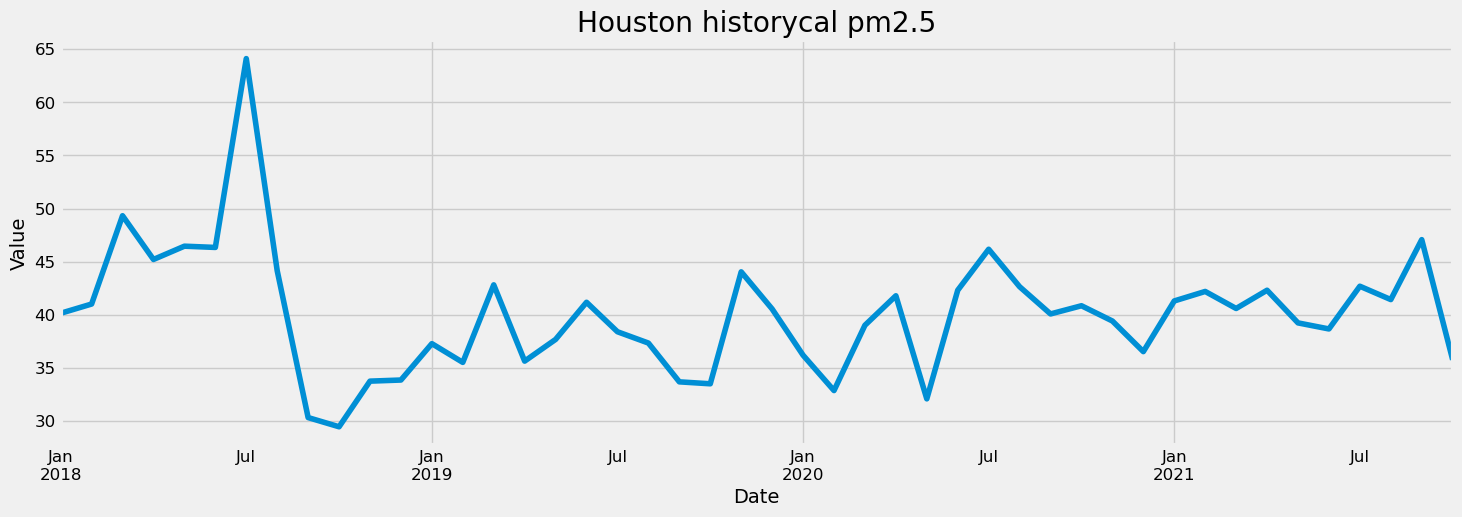

In [353]:
plot_df(houston_hist_m, title='Houston historycal pm2.5')

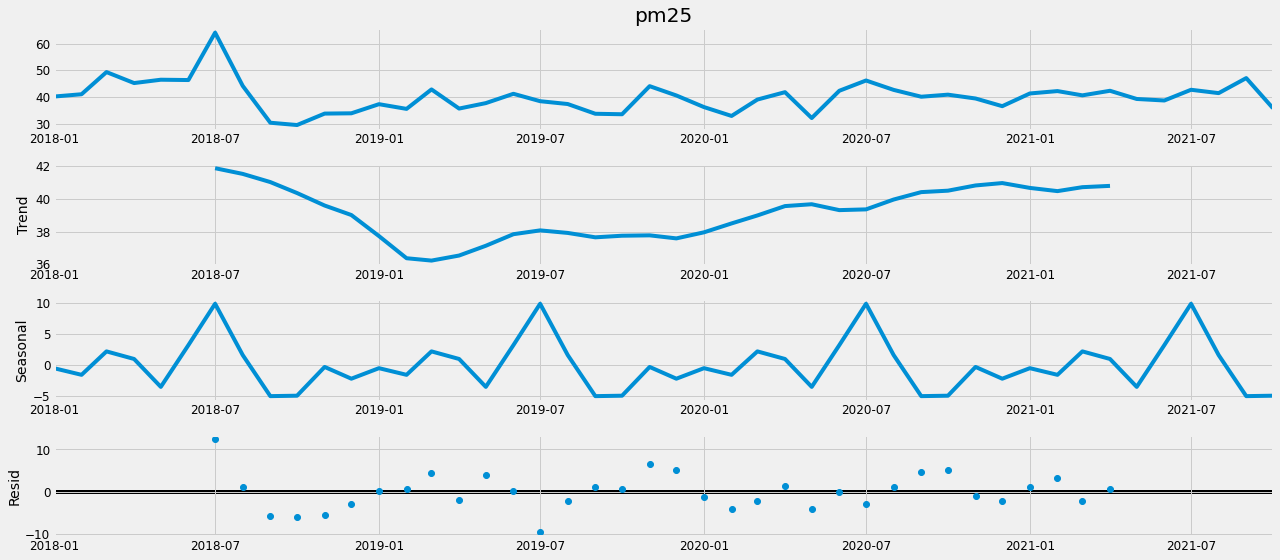

In [354]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(houston_hist_m, model='additive')
fig = decomposition.plot()

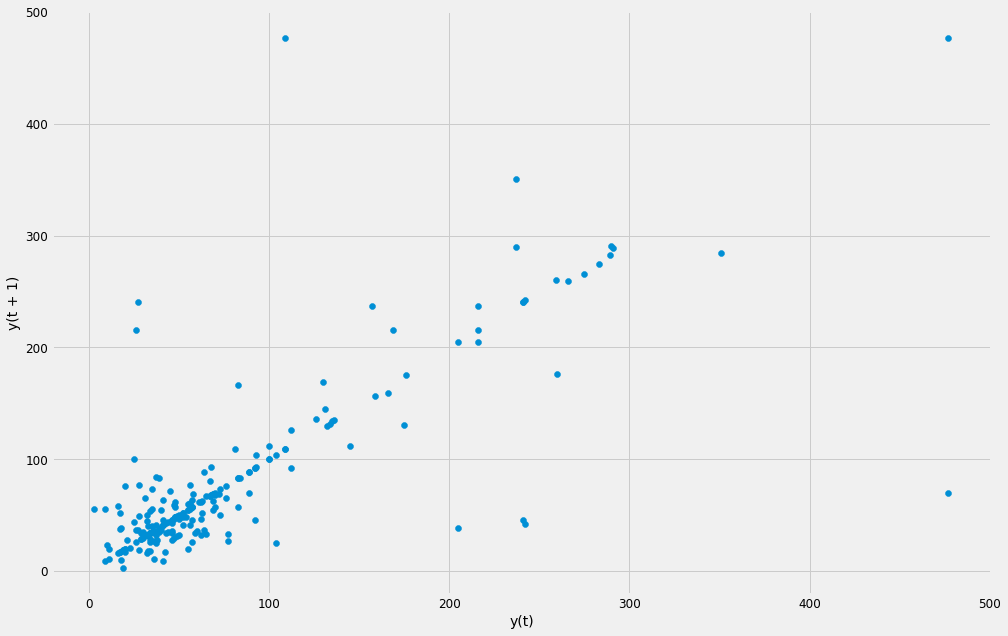

In [355]:
fig = plt.figure(figsize=[15, 10])
fig = pd.plotting.lag_plot(india_hist['value'])

In [358]:
from statsmodels.tsa.stattools import adfuller

test_adf = adfuller(houston_hist_m)

test_adf

(-4.248957230326495,
 0.0005438476562935623,
 0,
 45,
 {'1%': -3.584828853223594,
  '5%': -2.9282991495198907,
  '10%': -2.6023438271604937},
 193.72432491334754)

The null Hypothesis can be rejected since have a critical value of less than -2.9 and p value of less than 0.05. Which means that the time series is stationary.

In [359]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [360]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(houston_hist_m,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:462.7652273166967


/home/brida/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1494.1808307060246
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:226.4977221276216


/home/brida/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:130.11943883887682
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:232.95424033552345
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:226.90608356910224
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:135.3840258165571
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:131.74265192195415
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:405.18859790300934
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2262.0505630424313
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:216.74433369354935
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:126.42285188240257
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:228.9351822003793
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:217.61996136044408
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:136.98558392074088
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:127.74401376256374
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:290.9736111462782


/home/brida/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1322.4758274771175
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:225.88903909888086
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:135.8446450442504
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:202.30223695439167


/home/brida/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1285.405529431745
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:141.1953223704675
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:137.36617647885296
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:278.80068985559393


/home/brida/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:1343.4257593715151
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:214.9077928466698
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:122.87874355283158
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:186.79822775182782


/home/brida/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:1351.780184807734
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:134.04369404154457
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:121.90004010792032
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:298.15809552165257


/home/brida/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1609.393787378535
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:222.53467415045756
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:131.79838258806086
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:204.09844727255836
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:205.6810630210135
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:131.87850278173374
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:133.36659339094837
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:287.6046406578169


/home/brida/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:1358.0863303574117
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:218.47654631082386
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:128.4228209199648
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:185.56059801791338
ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:182.61866269877618
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:133.8425253668909
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:129.70780683022173
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:290.84751137373496


/home/brida/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1211.348734013734
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:225.05866818384823
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:134.56215820449054
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:193.8719704815963


/home/brida/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1219.713749153042
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:132.84053841883764
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:134.7146720645004
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:276.3706182157991


/home/brida/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:1178.2795161284732
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:214.9172667448312
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:124.8191381069975
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:183.63729394634376


/home/brida/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:1187.1152214748151
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:130.3434050518468
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:123.73599170933572


In [102]:
india_hist = pd.read_csv('india_historical.csv')

In [103]:
india_hist.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
0,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30T13:15:00+00:00,2021-09-30T18:45:00+05:30,pm10,178,µg/m³,28.647622,77.315809
1,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30T12:45:00+00:00,2021-09-30T18:15:00+05:30,pm10,376,µg/m³,28.647622,77.315809


In [104]:
india_hist.utc.min()

'2018-03-09T03:30:00+00:00'

In [105]:
india_hist.utc.max()

'2021-09-30T13:15:00+00:00'

In [106]:
india_hist.parameter.value_counts()

pm10    301
pm25    222
Name: parameter, dtype: int64

In [107]:
india_hist = india_hist.loc[india_hist['parameter'] == 'pm25']

In [108]:
india_hist.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
2,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30T12:45:00+00:00,2021-09-30T18:15:00+05:30,pm25,242,µg/m³,28.647622,77.315809
4,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30T12:15:00+00:00,2021-09-30T17:45:00+05:30,pm25,242,µg/m³,28.647622,77.315809


In [109]:
india_hist['utc'] = pd.to_datetime(india_hist['utc'])

In [110]:
india_hist['utc'].max(), india_hist['utc'].min()

(Timestamp('2021-09-30 12:45:00+0000', tz='UTC'),
 Timestamp('2018-03-09 03:30:00+0000', tz='UTC'))

In [111]:
india_hist.head(2)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
2,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30 12:45:00+00:00,2021-09-30T18:15:00+05:30,pm25,242,µg/m³,28.647622,77.315809
4,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30 12:15:00+00:00,2021-09-30T17:45:00+05:30,pm25,242,µg/m³,28.647622,77.315809


In [112]:
india_hist['parameter'].unique()

array(['pm25'], dtype=object)

In [113]:
india_hist.shape

(222, 11)

In [114]:
india_hist['utc'].value_counts()

2021-09-30 04:45:00+00:00    1
2021-09-27 04:15:00+00:00    1
2021-09-30 05:30:00+00:00    1
2021-09-22 14:15:00+00:00    1
2021-09-28 10:45:00+00:00    1
                            ..
2021-09-30 01:30:00+00:00    1
2021-09-22 10:15:00+00:00    1
2021-09-27 19:45:00+00:00    1
2021-09-22 21:15:00+00:00    1
2018-05-10 07:30:00+00:00    1
Name: utc, Length: 222, dtype: int64

In [115]:
idx = pd.date_range(start='2018-03-09 03:30:00+0000', end='2021-09-30 12:45:00+0000', periods=222)

In [116]:
india_hist

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
2,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30 12:45:00+00:00,2021-09-30T18:15:00+05:30,pm25,242,µg/m³,28.647622,77.315809
4,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30 12:15:00+00:00,2021-09-30T17:45:00+05:30,pm25,242,µg/m³,28.647622,77.315809
5,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30 11:45:00+00:00,2021-09-30T17:15:00+05:30,pm25,42,µg/m³,28.647622,77.315809
11,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30 09:00:00+00:00,2021-09-30T14:30:00+05:30,pm25,17,µg/m³,28.647622,77.315809
12,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30 08:30:00+00:00,2021-09-30T14:00:00+05:30,pm25,17,µg/m³,28.647622,77.315809
...,...,...,...,...,...,...,...,...,...,...,...
513,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2018-03-10 02:30:00+00:00,2018-03-10T08:00:00+05:30,pm25,169,µg/m³,28.647622,77.315809
515,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2018-03-09 22:30:00+00:00,2018-03-10T04:00:00+05:30,pm25,216,µg/m³,28.647622,77.315809
518,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2018-03-09 20:30:00+00:00,2018-03-10T02:00:00+05:30,pm25,237,µg/m³,28.647622,77.315809
520,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2018-03-09 06:30:00+00:00,2018-03-09T12:00:00+05:30,pm25,351,µg/m³,28.647622,77.315809


In [117]:
india_hist = india_hist.set_index(idx)

In [118]:
india_hist.dtypes

locationId                  int64
location                   object
city                       object
country                    object
utc           datetime64[ns, UTC]
local                      object
parameter                  object
value                       int64
unit                       object
latitude                  float64
longitude                 float64
dtype: object

In [119]:
india_hist.head(130)

,locationId,location,city,country,utc,local,parameter,value,unit,latitude,longitude
2018-03-09 03:30:00+00:00,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30 12:45:00+00:00,2021-09-30T18:15:00+05:30,pm25,242,µg/m³,28.647622,77.315809
2018-03-15 00:49:36.923076923+00:00,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30 12:15:00+00:00,2021-09-30T17:45:00+05:30,pm25,242,µg/m³,28.647622,77.315809
2018-03-20 22:09:13.846153846+00:00,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30 11:45:00+00:00,2021-09-30T17:15:00+05:30,pm25,42,µg/m³,28.647622,77.315809
2018-03-26 19:28:50.769230769+00:00,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30 09:00:00+00:00,2021-09-30T14:30:00+05:30,pm25,17,µg/m³,28.647622,77.315809
2018-04-01 16:48:27.692307692+00:00,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-30 08:30:00+00:00,2021-09-30T14:00:00+05:30,pm25,17,µg/m³,28.647622,77.315809
...,...,...,...,...,...,...,...,...,...,...,...
2020-03-14 05:21:55.384615384+00:00,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-25 17:30:00+00:00,2021-09-25T23:00:00+05:30,pm25,17,µg/m³,28.647622,77.315809
2020-03-20 02:41:32.307692304+00:00,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-24 02:45:00+00:00,2021-09-24T08:15:00+05:30,pm25,38,µg/m³,28.647622,77.315809
2020-03-26 00:01:09.230769232+00:00,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-23 23:15:00+00:00,2021-09-24T04:45:00+05:30,pm25,28,µg/m³,28.647622,77.315809
2020-03-31 21:20:46.153846152+00:00,5509,"Anand Vihar, Delhi - DPCC",Delhi,IN,2021-09-23 14:45:00+00:00,2021-09-23T20:15:00+05:30,pm25,77,µg/m³,28.647622,77.315809


In [120]:
india_hist.isnull().sum()

locationId    0
location      0
city          0
country       0
utc           0
local         0
parameter     0
value         0
unit          0
latitude      0
longitude     0
dtype: int64

In [121]:
india_hist = india_hist['value'].to_frame()

In [122]:
india_hist.head()

,value
2018-03-09 03:30:00+00:00,242
2018-03-15 00:49:36.923076923+00:00,242
2018-03-20 22:09:13.846153846+00:00,42
2018-03-26 19:28:50.769230769+00:00,17
2018-04-01 16:48:27.692307692+00:00,17


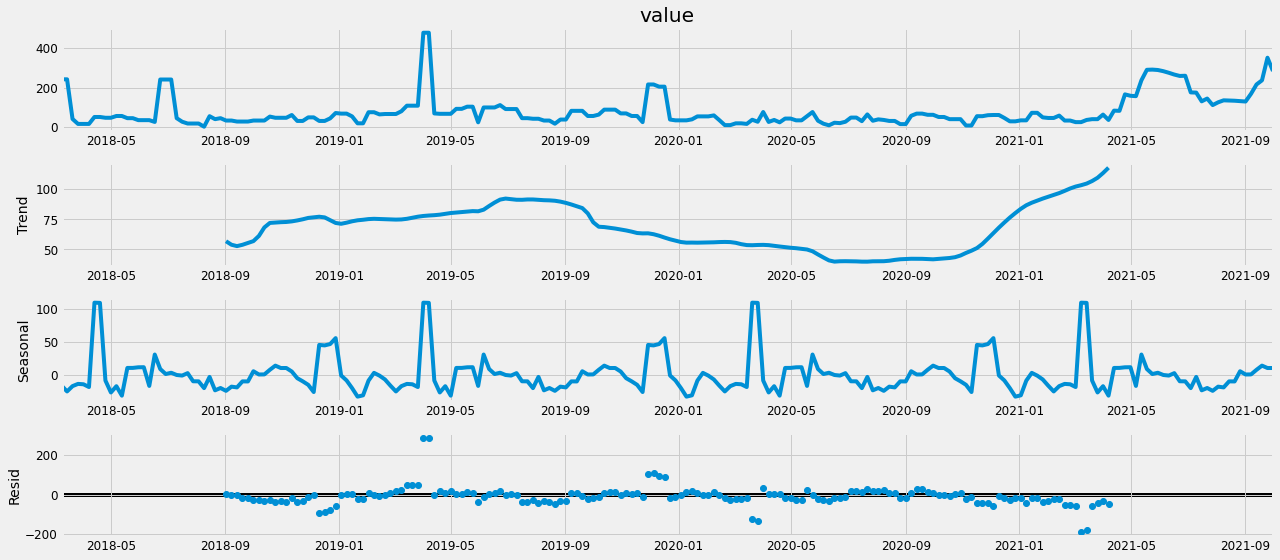

In [123]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8

decomposition = sm.tsa.seasonal_decompose(india_hist['value'], period=60)
fig = decomposition.plot()

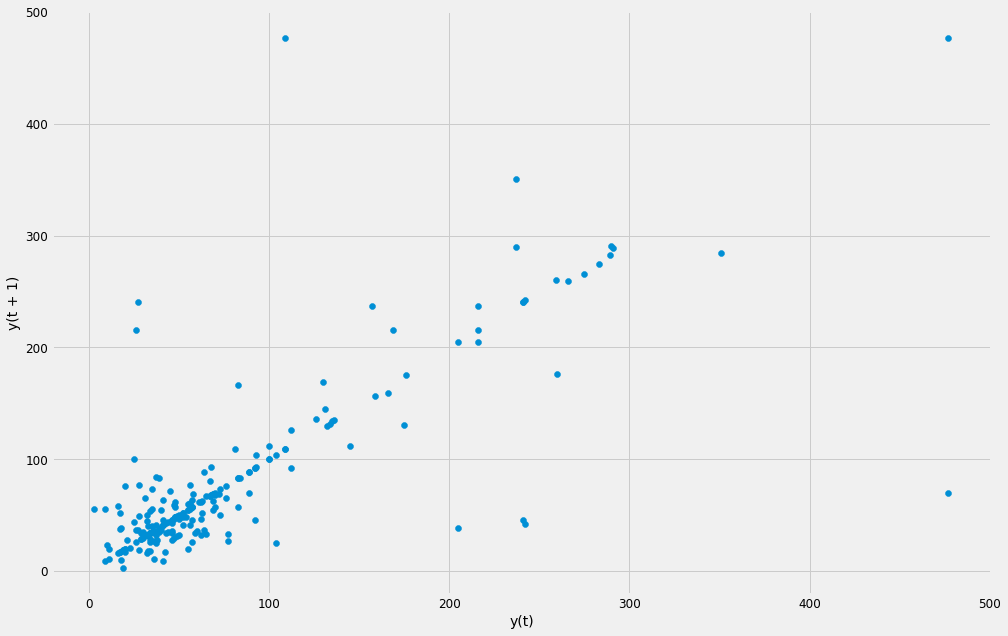

In [124]:
fig = plt.figure(figsize=[15, 10])
fig = pd.plotting.lag_plot(india_hist['value'])

In [128]:
from statsmodels.tsa.stattools import adfuller

test_adf = adfuller(india_hist['value'])

test_adf

(-3.989144681109438,
 0.0014684317883156739,
 2,
 219,
 {'1%': -3.460567372610299,
  '5%': -2.874829809033386,
  '10%': -2.573853225954421},
 2192.944327789395)

In [581]:
# can be rejected the null hypothesis since have a critic
# value of less than -2.9 and p value of less than 0.05. Which means that the time series is stationary.

The time series is stationary

In [584]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [575]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(india_hist,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:2709.838464934356
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:2520.9216645944234
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:2519.4110835519596


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:2304.9305407028887
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:2498.2384688021552


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:2452.824039277005
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:2336.4030598284207


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:2306.8513045455193
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:2503.899183325733


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2352.501076666998
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:2390.114864363988


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:2163.135127778056
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:2360.144303758404


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2305.445795630042


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:2214.985641664355


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:2165.1349111880418
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:2366.675361441051
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:2232.7228745083494


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:2401.310475549262


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:2131.2059306297297
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:2243.958215433738


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:2231.4387430030283
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:2199.931210796318


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:2132.250426123355
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:2343.6345203459373


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2224.6160754350017
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:2386.333819622493


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:2120.5545309991244
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:2245.603141285819


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2219.44751533166
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:2201.7734355172915


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:2121.7836556230054
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:2366.684550519767


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:2237.5772786941416
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:2379.226130542678


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:2123.8447305273667
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:2238.3841380838476


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:2237.159305788055
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:2173.307565495663


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:2125.430592024147
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:2357.5562032762978


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:2229.701522938627
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:2364.25682385274


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:2113.4415450444912
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:2240.154599656408


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2229.272010533604
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:2169.3951162956373


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:2115.2932202888846
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:2368.58793375208
ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:2234.5534076030535
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:2403.1253203138867


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:2132.8494381462338
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:2236.064848491082


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:2233.3250931615335
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:2191.7082866019646


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:2133.8278774235605
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:2325.667590872715


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2207.057836799161


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:2360.9406565240815


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:2103.3343908653605


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:2218.110934293397


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2202.1615905064327


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:2169.910212688361


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:2104.926535202564


In [586]:
model_param = list()
aic = list()

for param in pdq:
  for param_estacional in season_pdq:
    try:
      model = sm.tsa.statespace.SARIMAX(
          india_hist, # Serie de tiempo
          order=param,
          seasonal_order=param_estacional, 
          enforce_stationarity=False
      )

      results = model.fit()
      model_param.append((param, param_estacional))
      aic.append(results.aic)
      print(f'SARIMAX {param} x {param_estacional}, 12 - AIC: {results.aic}')
    except:
      print('Algo salió mal.')
      continue

C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (0, 0, 0) x (0, 0, 0, 12), 12 - AIC: 2709.838464934356
SARIMAX (0, 0, 0) x (0, 0, 1, 12), 12 - AIC: 2520.921664594464


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX (0, 0, 0) x (0, 1, 0, 12), 12 - AIC: 2519.4110835519596


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX (0, 0, 0) x (0, 1, 1, 12), 12 - AIC: 2304.930540849148
SARIMAX (0, 0, 0) x (1, 0, 0, 12), 12 - AIC: 2498.2384688021552


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (0, 0, 0) x (1, 0, 1, 12), 12 - AIC: 2452.8240392987445
SARIMAX (0, 0, 0) x (1, 1, 0, 12), 12 - AIC: 2336.4030598284207


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (0, 0, 0) x (1, 1, 1, 12), 12 - AIC: 2306.8513045625787
SARIMAX (0, 0, 1) x (0, 0, 0, 12), 12 - AIC: 2503.8991835558136


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (0, 0, 1) x (0, 0, 1, 12), 12 - AIC: 2352.5010766493906
SARIMAX (0, 0, 1) x (0, 1, 0, 12), 12 - AIC: 2390.1148643930987


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (0, 0, 1) x (0, 1, 1, 12), 12 - AIC: 2163.135195784911
SARIMAX (0, 0, 1) x (1, 0, 0, 12), 12 - AIC: 2360.1443037318777


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (0, 0, 1) x (1, 0, 1, 12), 12 - AIC: 2305.4457951571776
SARIMAX (0, 0, 1) x (1, 1, 0, 12), 12 - AIC: 2214.9856416603834


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (0, 0, 1) x (1, 1, 1, 12), 12 - AIC: 2165.134911184332
SARIMAX (0, 1, 0) x (0, 0, 0, 12), 12 - AIC: 2366.675361441051
SARIMAX (0, 1, 0) x (0, 0, 1, 12), 12 - AIC: 2232.7228745282373


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (0, 1, 0) x (0, 1, 0, 12), 12 - AIC: 2401.310475549262


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX (0, 1, 0) x (0, 1, 1, 12), 12 - AIC: 2131.2093551668295
SARIMAX (0, 1, 0) x (1, 0, 0, 12), 12 - AIC: 2243.958215433738


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (0, 1, 0) x (1, 0, 1, 12), 12 - AIC: 2231.4387429935696
SARIMAX (0, 1, 0) x (1, 1, 0, 12), 12 - AIC: 2199.931210796318


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (0, 1, 0) x (1, 1, 1, 12), 12 - AIC: 2132.251048209849
SARIMAX (0, 1, 1) x (0, 0, 0, 12), 12 - AIC: 2343.63452026288


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (0, 1, 1) x (0, 0, 1, 12), 12 - AIC: 2224.616075043445
SARIMAX (0, 1, 1) x (0, 1, 0, 12), 12 - AIC: 2386.3338197242847
SARIMAX (0, 1, 1) x (0, 1, 1, 12), 12 - AIC: 2120.5546188715043
SARIMAX (0, 1, 1) x (1, 0, 0, 12), 12 - AIC: 2245.6031392726


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (0, 1, 1) x (1, 0, 1, 12), 12 - AIC: 2219.4503568177897
SARIMAX (0, 1, 1) x (1, 1, 0, 12), 12 - AIC: 2201.773435523443


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (0, 1, 1) x (1, 1, 1, 12), 12 - AIC: 2121.7843575405814
SARIMAX (1, 0, 0) x (0, 0, 0, 12), 12 - AIC: 2366.684550519767


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (1, 0, 0) x (0, 0, 1, 12), 12 - AIC: 2237.5772788441373
SARIMAX (1, 0, 0) x (0, 1, 0, 12), 12 - AIC: 2379.226130542678


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (1, 0, 0) x (0, 1, 1, 12), 12 - AIC: 2124.0746394805783
SARIMAX (1, 0, 0) x (1, 0, 0, 12), 12 - AIC: 2238.3841380838476


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (1, 0, 0) x (1, 0, 1, 12), 12 - AIC: 2237.15930529101
SARIMAX (1, 0, 0) x (1, 1, 0, 12), 12 - AIC: 2173.307565495663


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (1, 0, 0) x (1, 1, 1, 12), 12 - AIC: 2125.7537346415847
SARIMAX (1, 0, 1) x (0, 0, 0, 12), 12 - AIC: 2357.5562034274126


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (1, 0, 1) x (0, 0, 1, 12), 12 - AIC: 2229.701522925936
SARIMAX (1, 0, 1) x (0, 1, 0, 12), 12 - AIC: 2364.256027761672


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (1, 0, 1) x (0, 1, 1, 12), 12 - AIC: 2113.8177043077367
SARIMAX (1, 0, 1) x (1, 0, 0, 12), 12 - AIC: 2240.154599442724


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (1, 0, 1) x (1, 0, 1, 12), 12 - AIC: 2229.272010208949


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX (1, 0, 1) x (1, 1, 0, 12), 12 - AIC: 2169.3951161617097


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX (1, 0, 1) x (1, 1, 1, 12), 12 - AIC: 2115.72500857308
SARIMAX (1, 1, 0) x (0, 0, 0, 12), 12 - AIC: 2368.58793375208
SARIMAX (1, 1, 0) x (0, 0, 1, 12), 12 - AIC: 2234.5534071753727
SARIMAX (1, 1, 0) x (0, 1, 0, 12), 12 - AIC: 2403.1253203138867


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (1, 1, 0) x (0, 1, 1, 12), 12 - AIC: 2132.8494546600045
SARIMAX (1, 1, 0) x (1, 0, 0, 12), 12 - AIC: 2236.064848491082


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (1, 1, 0) x (1, 0, 1, 12), 12 - AIC: 2233.3250930565277
SARIMAX (1, 1, 0) x (1, 1, 0, 12), 12 - AIC: 2191.7082866019646


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (1, 1, 0) x (1, 1, 1, 12), 12 - AIC: 2133.828675335818
SARIMAX (1, 1, 1) x (0, 0, 0, 12), 12 - AIC: 2325.6675909826836


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it ha

SARIMAX (1, 1, 1) x (0, 0, 1, 12), 12 - AIC: 2207.057836545283


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX (1, 1, 1) x (0, 1, 0, 12), 12 - AIC: 2360.948194499199


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX (1, 1, 1) x (0, 1, 1, 12), 12 - AIC: 2107.8808301502036


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX (1, 1, 1) x (1, 0, 0, 12), 12 - AIC: 2218.1109341732035


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX (1, 1, 1) x (1, 0, 1, 12), 12 - AIC: 2202.1615909018874


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX (1, 1, 1) x (1, 1, 0, 12), 12 - AIC: 2170.2877396647964


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


SARIMAX (1, 1, 1) x (1, 1, 1, 12), 12 - AIC: 2109.486559599781


In [587]:
df_model = pd.DataFrame(zip(model_param, aic), columns=['parameters', 'aic'])
df_model.head()

,parameters,aic
0,"((0, 0, 0), (0, 0, 0, 12))",2709.838465
1,"((0, 0, 0), (0, 0, 1, 12))",2520.921665
2,"((0, 0, 0), (0, 1, 0, 12))",2519.411084
3,"((0, 0, 0), (0, 1, 1, 12))",2304.930541
4,"((0, 0, 0), (1, 0, 0, 12))",2498.238469


In [596]:
df_model.min()

parameters    ((0, 0, 0), (0, 0, 0, 12))
aic                           2107.88083
dtype: object

In [599]:
model = sm.tsa.statespace.SARIMAX(
    india_hist,
    order=(0, 0, 0),
    seasonal_order=(0, 0, 0, 12),
    enforce_stationarity=False
)

results = model.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      1.227e+04    709.961     17.281      0.000    1.09e+04    1.37e+04


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


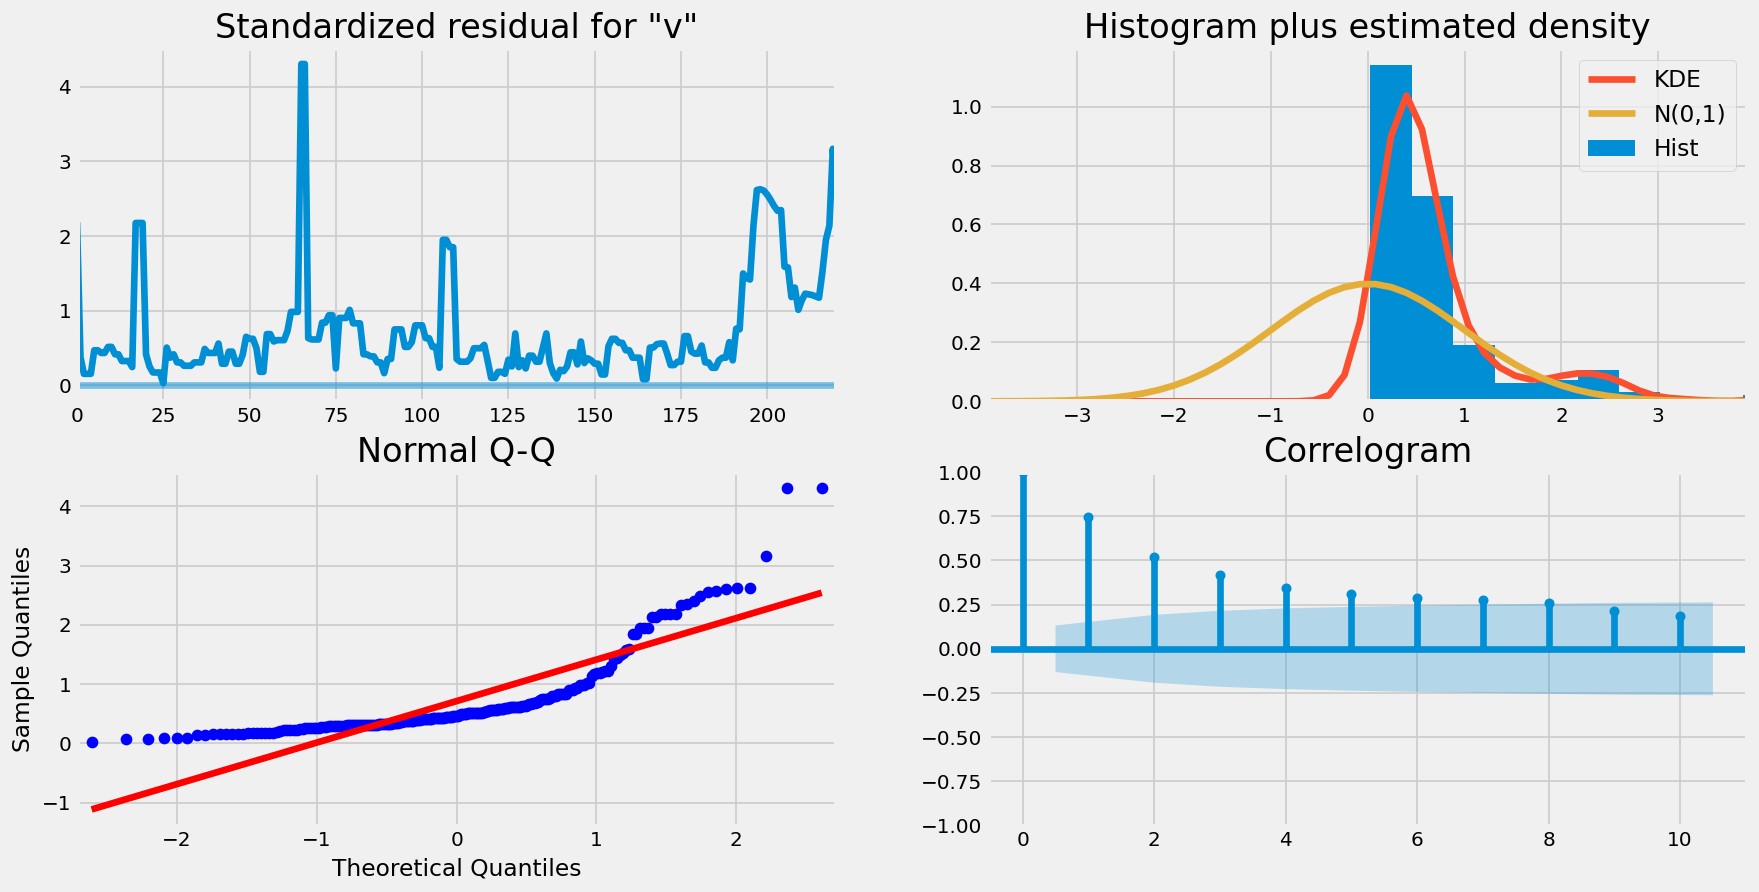

In [598]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

In [605]:
india_hist.tail(20)

,value
2021-06-10 15:32:18.461538464+00:00,275
2021-06-16 12:51:55.384615376+00:00,266
2021-06-22 10:11:32.307692304+00:00,259
2021-06-28 07:31:09.230769232+00:00,260
2021-07-04 04:50:46.153846144+00:00,176
2021-07-10 02:10:23.076923072+00:00,175
2021-07-15 23:30:00+00:00,131
2021-07-21 20:49:36.923076928+00:00,145
2021-07-27 18:09:13.846153840+00:00,112
2021-08-02 15:28:50.769230768+00:00,126


In [601]:
india_hist.dtypes

value    int64
dtype: object

In [602]:
pred = results.get_prediction(start=pd.to_datetime('2021-09-06 23:26:32.307692304+00:00'))
pred_conf_int = pred.conf_int()
pred_conf_int

,lower value,upper value
2021-09-06 23:26:32.307692304+00:00,-217.094101,217.094101
2021-09-12 20:46:09.230769232+00:00,-217.094101,217.094101
2021-09-18 18:05:46.153846144+00:00,-217.094101,217.094101
2021-09-24 15:25:23.076923072+00:00,-217.094101,217.094101
2021-09-30 12:45:00+00:00,-217.094101,217.094101


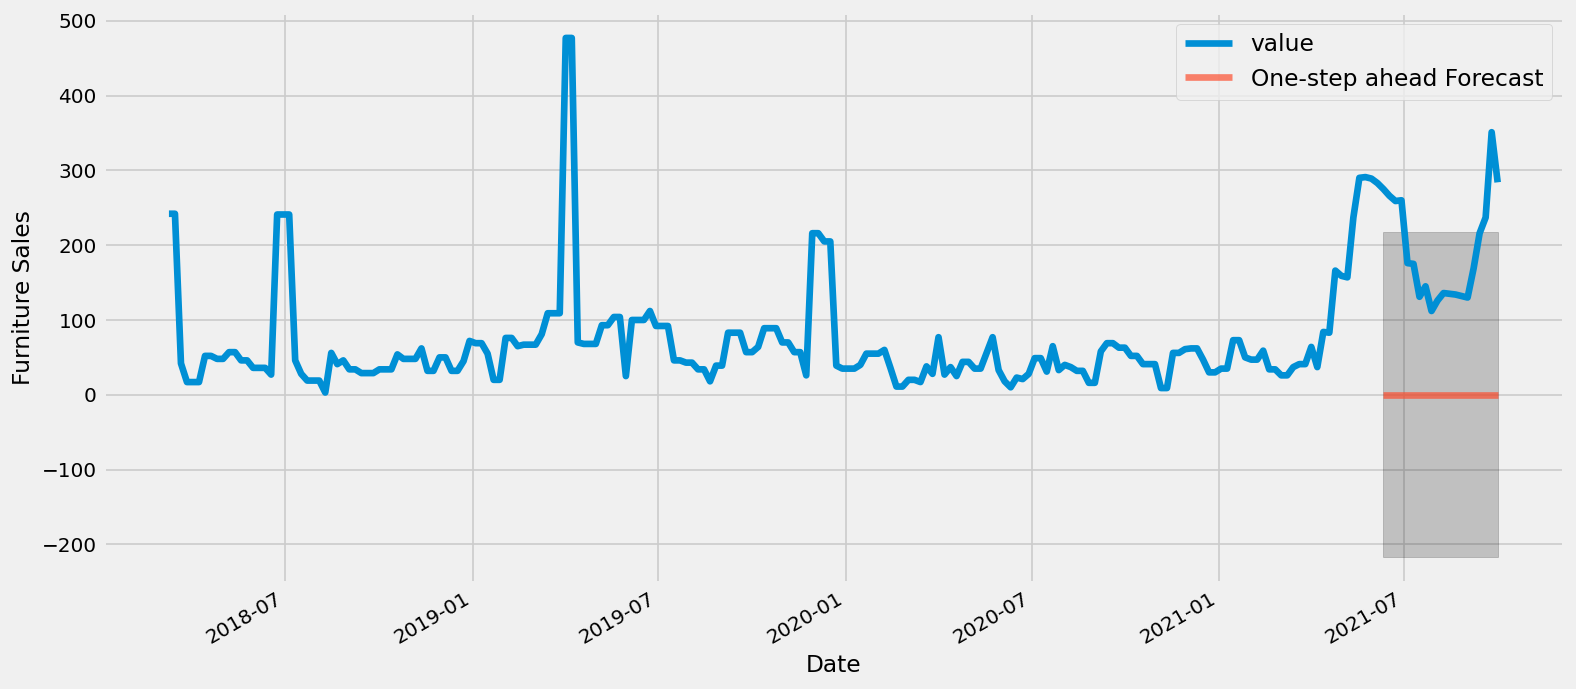

In [606]:
pred = results.get_prediction(start=pd.to_datetime('2021-06-10 15:32:18.461538464+00:00'), dynamic=False)
pred_ci = pred.conf_int()

ax = india_hist['2018':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()

plt.show()

In [607]:
y_forecasted = pred.predicted_mean
y_truth = india_hist['2018-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2021-06-10 15:32:18.461538464+00:00   NaN
2021-06-16 12:51:55.384615376+00:00   NaN
2021-06-22 10:11:32.307692304+00:00   NaN
2021-06-28 07:31:09.230769232+00:00   NaN
2021-07-04 04:50:46.153846144+00:00   NaN
2021-07-10 02:10:23.076923072+00:00   NaN
2021-07-15 23:30:00+00:00             NaN
2021-07-21 20:49:36.923076928+00:00   NaN
2021-07-27 18:09:13.846153840+00:00   NaN
2021-08-02 15:28:50.769230768+00:00   NaN
2021-08-08 12:48:27.692307696+00:00   NaN
2021-08-14 10:08:04.615384608+00:00   NaN
2021-08-20 07:27:41.538461536+00:00   NaN
2021-08-26 04:47:18.461538464+00:00   NaN
2021-09-01 02:06:55.384615376+00:00   NaN
2021-09-06 23:26:32.307692304+00:00   NaN
2021-09-12 20:46:09.230769232+00:00   NaN
2021-09-18 18:05:46.153846144+00:00   NaN
2021-09-24 15:25:23.076923072+00:00   NaN
2021-09-30 12:45:00+00:00             NaN
value                                 NaN
dtype: float64


C:\Users\c725676\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


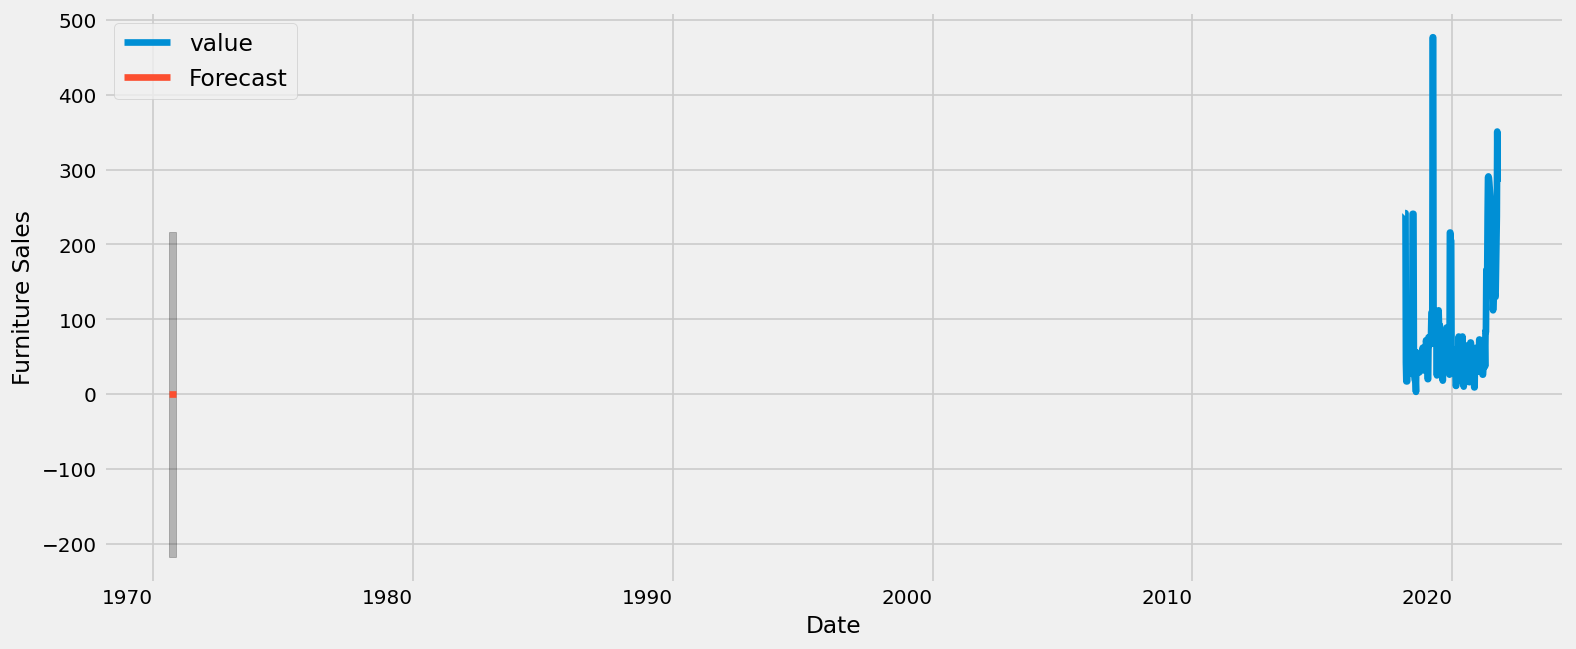

In [608]:
pred_uc = results.get_forecast(steps=100)
pred_ci = pred_uc.conf_int()
ax = india_hist.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()